In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!tar -xzvf "/content/drive/MyDrive/aclImdb_v1.tar.gz" -C "/content/drive/MyDrive/acllmdb"

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [ ]:
!pip install numpy
!pip install scikit-learn

In [ ]:
# Import necessary libraries
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Define data paths
train_pos_dir = "/content/drive/MyDrive/acllmdb/aclImdb/train/pos"
train_neg_dir = "/content/drive/MyDrive/acllmdb/aclImdb/train/neg"
test_pos_dir = "/content/drive/MyDrive/acllmdb/aclImdb/test/pos"
test_neg_dir = "/content/drive/MyDrive/acllmdb/aclImdb/test/neg"

# Load data
def load_data(directory):
    data = []
    for filename in os.listdir(directory):
        with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
            data.append(file.read())
    return data

train_pos_data = load_data(train_pos_dir)
train_neg_data = load_data(train_neg_dir)
test_pos_data = load_data(test_pos_dir)
test_neg_data = load_data(test_neg_dir)

# Create labels
train_labels = np.concatenate((np.ones(len(train_pos_data)), np.zeros(len(train_neg_data))))
test_labels = np.concatenate((np.ones(len(test_pos_data)), np.zeros(len(test_neg_data))))

# Combine positive and negative data
train_data = train_pos_data + train_neg_data
test_data = test_pos_data + test_neg_data

In [ ]:
train_pos_data

['There are some excellent comments and observations on this film. I was pleased to note the comparisons to Fritz Lang\'s "M" (forget the 50\'s abortive remake with lightweight David Wayne). The real villain is not the tortured murderer (extraordinarily fine performance by Jeffery DeMunn), taking out his sexually frustrated anger on his victims-- mostly children. He is the objective. The real villain is the stifling bureaucratic Soviet system, drowning in its own corrupted incompetence. The frustration of an uncompromisingly dedicated man (Rea in his best role since "The Crying Game"), a facile pragmatist who\'s willing to use the system to his advantage (Sutherland always successful in this kind of role), a hesitant, frightened but determined psychiatrist (the incomparable Max Sydow), the bumbling, boopous bureaucrat of a prosecutor (brilliant Brit actor John Wood) and the quiet, supporting wife of the driven investigator (delightful supporter, Imelda Staunton). This is one damn fine 

In [ ]:
import pandas as pd

In [ ]:
column_names=["reviews"]

In [ ]:
train_pos_df = pd.DataFrame(train_pos_data, columns = column_names)
train_neg_df = pd.DataFrame(train_neg_data,columns = column_names)
test_pos_df = pd.DataFrame(test_pos_data,columns = column_names)
test_neg_df = pd.DataFrame(test_neg_data,columns = column_names)

In [ ]:
train_pos_df

,reviews
0,There are some excellent comments and observat...
1,"This film is fun, if your a person who likes a..."
2,If you're looking for a Hollywood action packe...
3,A group of friends decide to take a camping tr...
4,"""A Thief in the Night"" is a film that was gene..."
...,...
12495,"The summary line above, spoken by James Cloud ..."
12496,Pierce Brosnan has sipped his last Martini and...
12497,"Well, of course not, women are overly sensitiv..."
12498,The first and second seasons started off shaki...


In [ ]:
train_pos_df.insert(1,"sentiment",np.ones(len(train_pos_df), dtype=np.int8))

In [ ]:
train_pos_df

,reviews,sentiment
0,There are some excellent comments and observat...,1
1,"This film is fun, if your a person who likes a...",1
2,If you're looking for a Hollywood action packe...,1
3,A group of friends decide to take a camping tr...,1
4,"""A Thief in the Night"" is a film that was gene...",1
...,...,...
12495,"The summary line above, spoken by James Cloud ...",1
12496,Pierce Brosnan has sipped his last Martini and...,1
12497,"Well, of course not, women are overly sensitiv...",1
12498,The first and second seasons started off shaki...,1


In [ ]:
train_neg_df.insert(1,"sentiment",np.zeros(len(train_pos_df), dtype=np.int8))
test_pos_df.insert(1,"sentiment",np.ones(len(train_pos_df), dtype=np.int8))
test_neg_df.insert(1,"sentiment",np.zeros(len(train_pos_df), dtype=np.int8))


In [ ]:
train_neg_df

,reviews,sentiment
0,CRIME BOSS is directed by Alberto De Martino; ...,0
1,Just okay film about a woman who is a twin hav...,0
2,Whatever possessed Guy Ritchie to remake Wertm...,0
3,"I had high hopes for this film, because I thou...",0
4,"The master of cheap erotic horror, Rolfe Kanef...",0
...,...,...
12495,"When converting a book to film, it is generall...",0
12496,I rarely make these comments but I felt compel...,0
12497,"Already his first claim, that desires are alwa...",0
12498,Hail Bollywood and men Directors !<br /><br />...,0


In [ ]:
train_data_collected = [train_pos_df, train_neg_df]

train_data_df = pd.concat(train_data_collected, ignore_index=True)
train_data_df.index += 1
display(train_data_df)

,reviews,sentiment
1,There are some excellent comments and observat...,1
2,"This film is fun, if your a person who likes a...",1
3,If you're looking for a Hollywood action packe...,1
4,A group of friends decide to take a camping tr...,1
5,"""A Thief in the Night"" is a film that was gene...",1
...,...,...
24996,"When converting a book to film, it is generall...",0
24997,I rarely make these comments but I felt compel...,0
24998,"Already his first claim, that desires are alwa...",0
24999,Hail Bollywood and men Directors !<br /><br />...,0


In [ ]:
test_data_collected = [test_pos_df, test_neg_df]

test_data_df = pd.concat(test_data_collected, ignore_index=True)
test_data_df.index += 1
display(test_data_df)

,reviews,sentiment
1,It is a surprising movie that gets you in your...,1
2,This was the most thought-provoking capital-pu...,1
3,I rented Boogie Nights last week and I could t...,1
4,This series has recently been unearthed and ex...,1
5,It's now 2005 and 15+ years since this cartoon...,1
...,...,...
24996,"As a sci-fi and casual Angelina Jolie fan, I t...",0
24997,I thought this movie was going to be a disgrac...,0
24998,"You have to see this movie, it's a big footnot...",0
24999,It is unsettling seeing so many people giving ...,0


In [ ]:
concatenated_df = pd.concat([train_data_df, test_data_df], ignore_index=True )
concatenated_df.index += 1
concatenated_df

,reviews,sentiment
1,There are some excellent comments and observat...,1
2,"This film is fun, if your a person who likes a...",1
3,If you're looking for a Hollywood action packe...,1
4,A group of friends decide to take a camping tr...,1
5,"""A Thief in the Night"" is a film that was gene...",1
...,...,...
49996,"As a sci-fi and casual Angelina Jolie fan, I t...",0
49997,I thought this movie was going to be a disgrac...,0
49998,"You have to see this movie, it's a big footnot...",0
49999,It is unsettling seeing so many people giving ...,0


In [ ]:
train_shuffled_data = train_data_df.sample(frac = 1).reset_index()
test_shuffled_data = test_data_df.sample(frac = 1).reset_index()

In [ ]:
test_shuffled_data

,index,reviews,sentiment
0,3980,Well as a life long fan of Kung Fu films I hav...,1
1,1866,This movie tells about the real life story of ...,1
2,8885,This movie probably isn't the funniest I've ev...,1
3,20374,"Best around the middle, when most characters g...",0
4,17801,I saw this in the cinema during its initial re...,0
...,...,...,...
24995,10575,This is a new Barbie movie. The graphics were ...,1
24996,14991,I LOVE Sandra Bullock-She's one of my all-time...,0
24997,24506,David Bryce's comments nearby are exceptionall...,0
24998,8015,This animated short is a remake of one of Tex ...,1


In [ ]:
train_reviews=train_data_df["reviews"]
train_sentiments=train_data_df["sentiment"]
test_reviews=test_data_df["reviews"]
test_sentiments=test_data_df["sentiment"]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(25000,) (25000,)
(25000,) (25000,)


In [ ]:
!pip install nltk
!pip install seaborn
!pip install matplotlib
!pip install beautifulsoup4
!pip install spacy
!pip install WordCloud
!pip install textblob

In [ ]:
!pip install tqdm

In [ ]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from tqdm import tqdm

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense,Dropout,Bidirectional,Conv1D
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import re

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [ ]:
def preprocess_text(text):
    # 去除HTML标签
    text = re.sub(r'<[^>]+>', ' ', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    stemmed_tokens = [PorterStemmer().stem(token) for token in filtered_tokens]
    preprocessed_text = ' '.join(stemmed_tokens)
    return preprocessed_text.lower()

In [ ]:
train_shuffled_data['reviews']=train_data_df['reviews'].apply(preprocess_text)
test_shuffled_data['reviews']=test_data_df['reviews'].apply(preprocess_text)

In [ ]:
train_shuffled_data['reviews']

0                                                      NaN
1        excel comment observ film . pleas note compari...
2        film fun , person like good campi featur film ...
3        're look hollywood action pack kid-flick commo...
4        group friend decid take camp trip desert-and f...
                               ...                        
24995    read book realli enjoy begin end . howev , saw...
24996    convert book film , gener good idea keep least...
24997    rare make comment felt compel spare other pain...
24998    alreadi first claim , desir alway artifici , t...
24999    hail bollywood men director ! realli ultim lim...
Name: reviews, Length: 25000, dtype: object

In [ ]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
train_data_df['reviews']=train_data_df['reviews'].apply(denoise_text)
test_data_df['reviews']=test_data_df['reviews'].apply(denoise_text)

<ipython-input-41-938cff5c9476>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [ ]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
train_data_df['reviews']=train_data_df['reviews'].apply(remove_special_characters)
test_data_df['reviews']=test_data_df['reviews'].apply(remove_special_characters)

In [ ]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
train_data_df['reviews']=train_data_df['reviews'].apply(simple_stemmer)
test_data_df['reviews']=test_data_df['reviews'].apply(simple_stemmer)

In [ ]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
#Apply function on review column
train_data_df['reviews']=train_data_df['reviews'].apply(remove_stopwords)
test_data_df['reviews']=test_data_df['reviews'].apply(remove_stopwords)

{'that', 'those', 'mightn', 'with', 'each', 'having', "needn't", 'other', "shouldn't", 'most', 'i', "weren't", 'when', 'won', 'ourselves', 'a', "don't", 'myself', 'these', 're', 'because', "doesn't", 'more', 't', 'up', 'in', 'himself', "wouldn't", "won't", 'it', 'd', 'very', 'but', 'hasn', 'him', 'hers', 'no', 'my', 'and', 'didn', 'so', 'any', 'how', 'hadn', "you've", 'herself', 'am', 'll', 've', 'above', 'are', 'ours', 'aren', 'our', 'you', "couldn't", 'weren', 'off', 'yours', 'don', 'again', 'needn', 'below', 'once', 'few', "isn't", 'some', 'yourselves', 'she', 'after', 'such', 'which', 'to', 'against', "wasn't", "she's", 'on', 'then', 'he', "that'll", 'has', 'ma', 'where', 'own', "you're", 'them', 'shouldn', 'further', 'just', 'not', 'as', "mustn't", 'we', 'do', 'theirs', 'during', 'me', 'his', 'can', 'yourself', 'through', 'nor', "mightn't", 'your', "it's", 'out', "should've", "shan't", "haven't", 'haven', 'at', 'all', 'themselves', 'mustn', 'who', 'ain', 'what', 'from', 'while', '

In [ ]:
train_shuffles = train_data_df.sample(frac = 1).reset_index()
test_shuffles = test_data_df.sample(frac = 1).reset_index()

In [ ]:
train_shuffles

,index,reviews,sentiment
0,1474,acid unremit beauti john schlesing masterpiec ...,1
1,11232,realli like thi movi cours idea pretti much th...,1
2,17120,thi movi wa long bore surpris wa select cann a...,0
3,5353,befor regular comment main curios thi love son...,1
4,22969,thi movi show us noth origin everi idea action...,0
...,...,...,...
24995,13886,univers soldier return worst movi ever made ho...,0
24996,427,1930 classi eleg adel marvel play dignifi reso...,1
24997,14948,seen men behind sun guess hope evolut style te...,0
24998,13777,gotta love cheesi low budget movi thi one come...,0


In [ ]:
#normalized train reviews
norm_train_reviews= train_shuffles["reviews"]
norm_train_reviews[1]
#convert dataframe to string
#norm_train_string=norm_train_reviews.to_string()
#Spelling correction using Textblob
#norm_train_spelling=TextBlob(norm_train_string)
#norm_train_spelling.correct()
#Tokenization using Textblob
#norm_train_words=norm_train_spelling.words
#norm_train_words

'realli like thi movi cours idea pretti much thereth feder govern arrang track devic implant jaw smalltim thief lure danger thiefcomput hacker hide alvin sander man fed volunt implant devic veri likabl person turn lot fun get hi head littl alvin even eventu prove much goodhumor passiv onedimension charact show nearli easili manipul may seem definetli worth watch'

In [ ]:
#Normalized test reviews
norm_test_reviews=test_shuffles["reviews"]
norm_test_reviews[24000]
#convert dataframe to string
#norm_test_string=norm_test_reviews.to_string()
#spelling correction using Textblob
#norm_test_spelling=TextBlob(norm_test_string)
#print(norm_test_spelling.correct())
#Tokenization using Textblob
#norm_test_words=norm_test_spelling.words
#norm_test_words

'never paid much attent thi flick learn paddi chayefski author brilliant network wa scriptwrit hi work instruct hi geniu hospit appear tmc wa anxiou see wa disappoint look thi film network would seem hi big theme absurd inan sheer vicious larg human enterpris eg hospit network sanctiti individu experi human spirit deliv knifeedg sens utterli black humor hospit black comedi network excel cast led incompar scott doe hi work full justic thi keeper definit miss'

In [ ]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()
#-toget feature names

BOW_cv_train: (25000, 4144530)
BOW_cv_test: (25000, 4144530)


In [ ]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (25000, 4144530)
Tfidf_test: (25000, 4144530)


In [ ]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_train_data=lb.fit_transform(train_shuffles['sentiment'])
sentiment_test_data=lb.fit_transform(test_shuffles['sentiment'])
print(sentiment_train_data.shape)
print(sentiment_test_data.shape)

(25000, 1)
(25000, 1)


In [ ]:
print(sentiment_train_data)
print(sentiment_test_data)

[[1]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]
[[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
#training the model
lr=LogisticRegression(C=1,penalty='l2',solver='liblinear')
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,sentiment_train_data.ravel())
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,sentiment_train_data.ravel())
print(lr_tfidf)

LogisticRegression(C=1, solver='liblinear')
LogisticRegression(C=1, solver='liblinear')


In [ ]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[1 0 1 ... 1 1 0]
[1 0 1 ... 1 1 0]


In [ ]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(sentiment_test_data,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(sentiment_test_data,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.68788
lr_tfidf_score : 0.68724


In [ ]:
#Classification report for bag of words
lr_bow_report=classification_report(sentiment_test_data,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(sentiment_test_data,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.68      0.72      0.70     12500
    Negative       0.70      0.66      0.68     12500

    accuracy                           0.69     25000
   macro avg       0.69      0.69      0.69     25000
weighted avg       0.69      0.69      0.69     25000

              precision    recall  f1-score   support

    Positive       0.67      0.73      0.70     12500
    Negative       0.70      0.65      0.67     12500

    accuracy                           0.69     25000
   macro avg       0.69      0.69      0.69     25000
weighted avg       0.69      0.69      0.69     25000



In [ ]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(tv_train_reviews,sentiment_train_data.ravel())
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.500000 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.500000 (0.000000) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.500000 (0.000000) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.500000 (0.000000) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.500000 (0.000000) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.500000 (0.000000) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.500000 (0.000000) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.500000 (0.000000) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.500000 (0.000000) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.500000 (0.000000) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.500000 (0.000000) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.500000 (0.000000) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.500000 (0.000000) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.500000 (0.000000) wit

In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[8231 4269]
 [3536 8964]]
[[8068 4432]
 [3384 9116]]


In [ ]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments.ravel())
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments.ravel())
print(svm_tfidf)

SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


In [ ]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[1 0 0 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [ ]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.61316
svm_tfidf_score : 0.50388


In [ ]:
#Classification report for bag of words
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.82      0.29      0.43     12500
    Negative       0.57      0.94      0.71     12500

    accuracy                           0.61     25000
   macro avg       0.69      0.61      0.57     25000
weighted avg       0.69      0.61      0.57     25000

              precision    recall  f1-score   support

    Positive       1.00      0.01      0.02     12500
    Negative       0.50      1.00      0.67     12500

    accuracy                           0.50     25000
   macro avg       0.75      0.50      0.34     25000
weighted avg       0.75      0.50      0.34     25000



In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[11710   790]
 [ 8881  3619]]
[[12500     0]
 [12403    97]]


In [ ]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments.ravel())
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments.ravel())
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


In [ ]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]


In [ ]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.6872
mnb_tfidf_score : 0.6872


In [ ]:
#Classification report for bag of words
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.67      0.73      0.70     12500
    Negative       0.70      0.65      0.67     12500

    accuracy                           0.69     25000
   macro avg       0.69      0.69      0.69     25000
weighted avg       0.69      0.69      0.69     25000

              precision    recall  f1-score   support

    Positive       0.67      0.73      0.70     12500
    Negative       0.70      0.65      0.67     12500

    accuracy                           0.69     25000
   macro avg       0.69      0.69      0.69     25000
weighted avg       0.69      0.69      0.69     25000



In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[8098 4402]
 [3418 9082]]
[[8098 4402]
 [3418 9082]]


<function matplotlib.pyplot.show(close=None, block=None)>

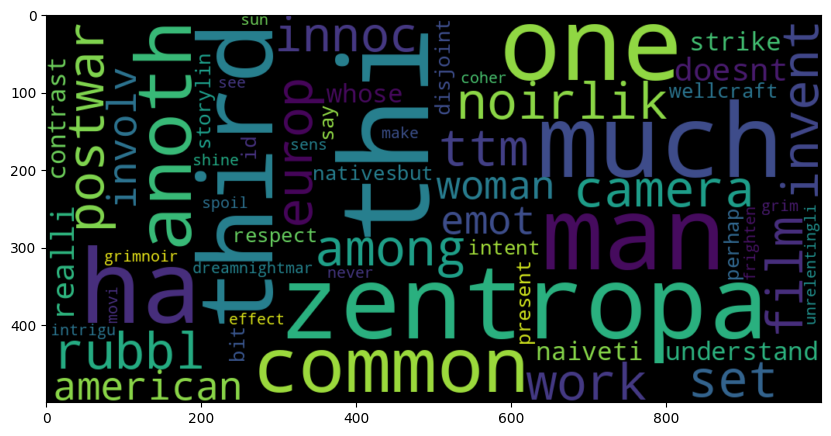

In [ ]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

In [ ]:
tv_train_reviews

<25000x4144530 sparse matrix of type '<class 'numpy.float64'>'
	with 4144530 stored elements in Compressed Sparse Row format>

In [ ]:
train_sentiments

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

<function matplotlib.pyplot.show(close=None, block=None)>

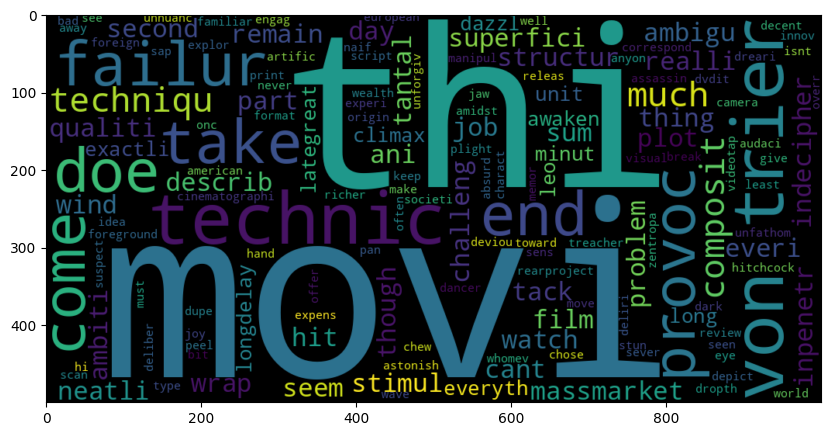

In [ ]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense,Dropout,Bidirectional,Conv1D
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import re

In [ ]:
train_texts, test_texts, train_labels, test_labels = train_test_split(concatenated_df["reviews"], concatenated_df["sentiment"], test_size=0.05, random_state=42)

num_words=10000
maxlen=500
label_encoder = LabelEncoder()

train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(train_texts)


train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

train_data = pad_sequences(train_sequences, maxlen=maxlen)
test_data = pad_sequences(test_sequences, maxlen=maxlen)

import tensorflow as tf
from keras.layers import Input, Attention, Concatenate,MaxPooling1D,Flatten
from keras.models import Model

input_sequence = Input(shape=(maxlen,))
embedding_layer = Embedding(input_dim=num_words, output_dim=maxlen)(input_sequence)
conv_layer = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)
pooling_layer = MaxPooling1D(pool_size=4)(conv_layer)
lstm_layer = LSTM(64)(pooling_layer)
flatten_layer = Flatten()(pooling_layer)
merged_layer = Concatenate()([lstm_layer, flatten_layer])
output_layer = Dense(1, activation='sigmoid')(merged_layer)

model = Model(inputs=input_sequence, outputs=output_layer)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(train_data, train_labels, batch_size=128, epochs=5, validation_split=0.2)

loss, accuracy = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {accuracy}')

Epoch 1/5
297/297 [==============================] - 1216s 4s/step - loss: 0.3476 - accuracy: 0.8321 - val_loss: 0.2415 - val_accuracy: 0.9053
Epoch 2/5
297/297 [==============================] - 1185s 4s/step - loss: 0.1676 - accuracy: 0.9373 - val_loss: 0.2469 - val_accuracy: 0.9043
Epoch 3/5
297/297 [==============================] - 1192s 4s/step - loss: 0.0829 - accuracy: 0.9712 - val_loss: 0.3035 - val_accuracy: 0.8936
Epoch 4/5
297/297 [==============================] - 1216s 4s/step - loss: 0.0250 - accuracy: 0.9927 - val_loss: 0.3683 - val_accuracy: 0.8985
Epoch 5/5
79/79 [==============================] - 22s 274ms/step - loss: 0.4530 - accuracy: 0.9004
Test accuracy: 0.9003999829292297


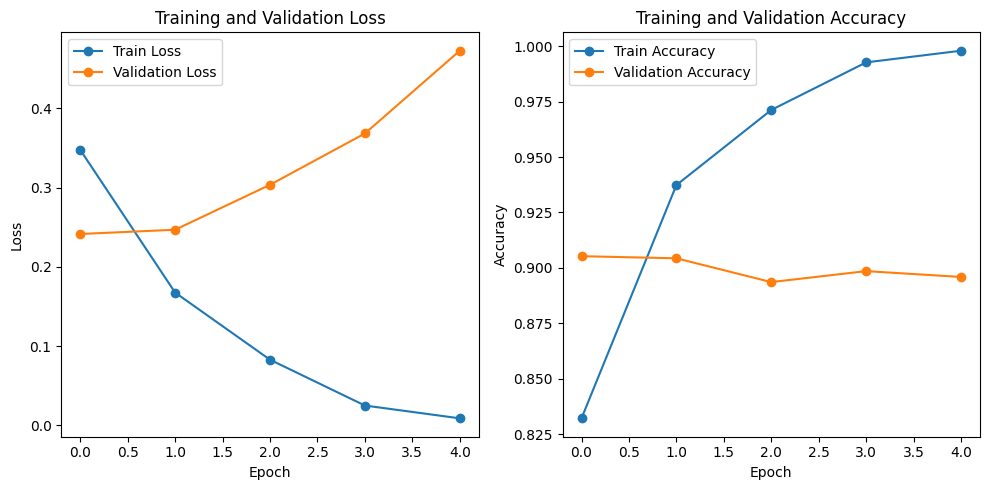

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy', marker='o')
plt.plot(val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
train_data_df

,reviews,sentiment
1,zentropa ha much common third man anoth noirli...,1
2,zentropa origin movi ive seen year like uniqu ...,1
3,lar von trier never backward tri new techniqu ...,1
4,contain spoiler due describ film techniqu read...,1
5,wa first thing sprang mind watch close credit ...,1
...,...,...
24996,isnt enough funni spot realli enough wa veri d...,0
24997,taint look kibbutz lifethi film less cultur st...,0
24998,saw thi movi wa releas hail best pictur year i...,0
24999,ani film begin cowhand shag femal calf cant pr...,0


In [ ]:
train_data_shuffled = train_data_df.sample(frac=1,random_state = 1,).reset_index()
test_data_shuffled = test_data_df.sample(frac=1,random_state = 1,).reset_index()

In [ ]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(tv_train_reviews,train_sentiments.ravel())
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

NameError: ignored

In [ ]:
# example of grid searching key hyperparametres for SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_tfidf, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# example of grid searching key hyperparameters for GradientBoostingClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))